In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure
import matplotlib
import webcolors
from webcolors import *

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 20)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.213978289678509
Iteration  10 : error is  12.04490300056418
Iteration  20 : error is  11.4029077057694
Iteration  30 : error is  12.712301146864545
Iteration  40 : error is  11.865146184476265
Iteration  50 : error is  12.880232835415724
Iteration  60 : error is  12.646259234647102
Iteration  70 : error is  12.37381068526496
Iteration  80 : error is  12.003575124421502
Iteration  90 : error is  12.94440604288043
Iteration  100 : error is  12.654893158927248
Iteration  110 : error is  1.6883922468927246
Iteration  120 : error is  1.3226329016122818
Iteration  130 : error is  1.1212826598738503
Iteration  140 : error is  0.9284505447993548
Iteration  150 : error is  0.7496832075553919
Iteration  160 : error is  0.6604085140972182
Iteration  170 : error is  0.6055125073678796
Iteration  180 : error is  0.5766924381030254
Iteration  190 : error is  0.5521

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

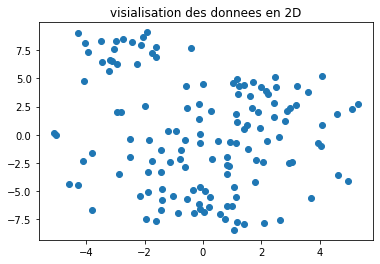

In [3]:
#construction du graphe pour visualiser les données 2D
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')
plt.title("visialisation des donnees en 2D")
plt.savefig('../Data/Graphes/visialisation_des_donne_en_2D.png',dpi=200)
plt.show()

In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer et choix du clustering qui fait le plus de sens------#

#on choisi k=5 clustering
k=5

cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des pays appartenant a chaque cluster
for i in range(0,k):
    cluster_classe[i] = []

k=5
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_2D)

#pour chaque cluster, je stocke la liste des pays associé
for i in range(0, len(kmeans.labels_) ):
    cp_liste=[]
    key=kmeans.labels_[i]
    cp_liste = cluster_classe[key]
    cp_liste.append(country_names[i])
    cluster_classe[key] = cp_liste

print("\n","#"*32,"Nombre de cluster= ", k, "#"*33, "\n|"," "*85,"|")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

li = 109
with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'w') as fichier:
    fichier.write(' '*8 +'Repartition des pays dans '+str(k)+' cluster \n\n+'+"-"*li +"+\n")
    fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
        

#on affiche les centroïdes de chaque cluster + le code de couleur associer
for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
        
    colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], k) )
    color_RGB= hex_to_rgb (colore_hex)
    
    #'get_colour_name' donne une approximation du nom de couleur la plus proche de celle sur l'image
    actual_name, colore_name = get_colour_name(color_RGB)
    
    with open('../Data/Graphes/data_task_1_k='+str(k)+'_Means.txt', 'a') as fichier:
        fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        
    print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    


 ################################ Nombre de cluster=  5 ################################# 
|                                                                                       |
|                   Austria -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Algeria -> centroïdes associer au Cluter N*: 2 color=( dodgerblue)  |
|                   Jamaica -> centroïdes associer au Cluter N*: 3 color=(  turquoise)  |
|                     Niger -> centroïdes associer au Cluter N*: 4 color=(greenyellow)  |
|                 Indonesia -> centroïdes associer au Cluter N*: 5 color=(  orangered)  |


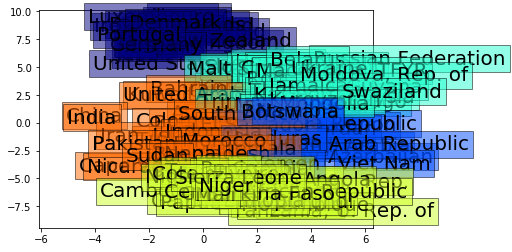

In [5]:
#----task_1.2 : graphe réduit pour visualiser sur l'écran d'ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)
plt.savefig('../Data/Graphes/visialisation_des_donne_pour_k_fixer_a_4.png',dpi=200)


 ################################## __pour k =  2 __ #################################### 
|                                                                                       |
|                  Slovenia -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                     Benin -> centroïdes associer au Cluter N*: 2 color=( lightgreen)  |
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 65
Cluster N* : 6

|                     Ghana -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Jamaica -> centroïdes associer au Cluter N*: 2 color=(       blue)  |
|                   Austria -> centroïdes associer au Cluter N*: 3 color=(deepskyblue)  |
|                Bangladesh -> centroïdes associer au Cluter N*: 4 color=( lightgreen)  |
|                   Algeria -> centroïdes associer au Cluter N*: 5 color=(       gold)  |
|                 Argentina -> centroïdes associer au Cluter N*: 6 color=(  orangered)  |
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* : 24
Cluster N* :

|                    Uganda -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Croatia -> centroïdes associer au Cluter N*: 2 color=(       blue)  |
|                   Algeria -> centroïdes associer au Cluter N*: 3 color=( dodgerblue)  |
|                   Austria -> centroïdes associer au Cluter N*: 4 color=(       cyan)  |
|                   Georgia -> centroïdes associer au Cluter N*: 5 color=( lightgreen)  |
|                 Argentina -> centroïdes associer au Cluter N*: 6 color=(     yellow)  |
|                   Senegal -> centroïdes associer au Cluter N*: 7 color=( darkorange)  |
|                 Sri Lanka -> centroïdes associer au Cluter N*: 8 color=(        red)  |
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster N* : 11
Cluster 

|                   Austria -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                 Indonesia -> centroïdes associer au Cluter N*: 2 color=(       blue)  |
|           Macedonia, TFYR -> centroïdes associer au Cluter N*: 3 color=( dodgerblue)  |
|                     Ghana -> centroïdes associer au Cluter N*: 4 color=(deepskyblue)  |
|                    Greece -> centroïdes associer au Cluter N*: 5 color=(  turquoise)  |
|                    Belize -> centroïdes associer au Cluter N*: 6 color=( lightgreen)  |
|      Syrian Arab Republic -> centroïdes associer au Cluter N*: 7 color=(greenyellow)  |
|   Lao People's Dem.  Rep. -> centroïdes associer au Cluter N*: 8 color=(       gold)  |
|                  Pakistan -> centroïdes associer au Cluter N*: 9 color=(  orangered)  |
|                   Armenia -> centroïdes associer au Cluter N*:10 color=(        red)  |
Cluster N* : 22
Cluster N* : 22
Cluster N* : 22
Cluster N* : 22
Cluster N* : 22
Cluster N* : 22
Clus

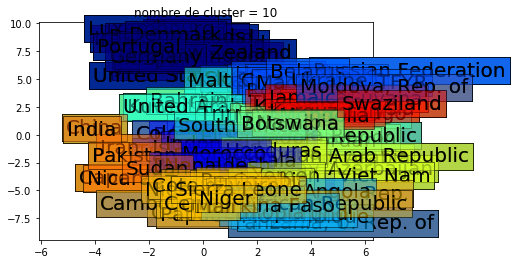

In [6]:
#-------task_2 :regrouper des données HDR avec l'algorithme k-means pour k = [2,10]. 
x,y =data_scaled.shape
precision=0.5

SSE = []
for cluster in range(2,11):
    
    cluster_classe = {} # vas stocker les ID de claque cluster avec la liste des noms de pays appartenant a chaque cluster
    for i in range(0,cluster):
        cluster_classe[i] = []
        
    clusterID_pays = {} # vas stocker les ID de claque cluster avec la liste des iD de pays appartenant a chaque cluster
    for i in range(0,cluster):
        clusterID_pays[i] = []
    
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
     
    #pour chaque cluster, je stocke la liste des pays associé
    for i in range(0, len(kmeans.labels_) ):
        key=kmeans.labels_[i]
        
        cp_liste=[]
        cp_liste = cluster_classe[key]
        cp_liste.append(country_names[i])
        cluster_classe[key] = cp_liste
        
        ID_liste=[] #### ajoute recent#####
        ID_liste = clusterID_pays[key] #### ajoute recent#####
        ID_liste.append(i) #### ajoute recent#####
        clusterID_pays[key] = ID_liste #### ajoute recent#####
       
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    print("\n","#"*34,"__pour k = ", cluster,"__", "#"*36, "\n|"," "*85,"|")
    plt.savefig('../Data/Graphes/'+str(cluster)+'_Means.png',dpi=200)
    
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    
    li = 109
    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
        fichier.write(' '*8 +'Tableau_1: Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
        fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
            
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        
        #je determine le nom de la couleur assicier a chaque cluster
        colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], cluster) )
        color_RGB= hex_to_rgb (colore_hex)
        actual_name, colore_name = get_colour_name(color_RGB)
        
        #je souvegarde la liste des pays par cluster dans un fichier .txt
        with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
            fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    
    #x,y =data_scaled.shape
    #precision=0.5
    stat = {}
    stat2 = {} #### ajoute recent#####
    li= 27+(8*cluster)

    AllStat={}
    for i in range(0,y):
        AllStat[i] = []
        
    AllStat2 = {} #### ajoute recent#####
    for i in range(0,y):
        AllStat2[i] = [[0] * 1] * cluster
  
    for i in range(0, len(clusterID_pays) ): #pour chaque cluster
        premier= clusterID_pays[i][0]
        valeur = data_scaled[premier]
        #care_liste = [[0] * 1] * y
        #care_liste = Max_Min_value[i]
        
        for j in range(0, y):#pour chaque caracteristique
            index =0
            index2 =[]

            for k in range(0, len(clusterID_pays[i]) ): #pour chaque pays
                pays=clusterID_pays[i][k]
                
                index2.append(data_scaled[pays][j]) #### ajoute recent#####
 
                if (data_scaled[pays][j]>=valeur[j]-precision) and (data_scaled[pays][j]<=valeur[j]+precision):
                    index=index+1
        
            stat[j]=index
            stat2[j]=index2 #### ajoute recent#####
            
        for m in range(0, len(stat) ): #pour chaque ligne contenant le nombre approxi de pays
            car_liste=[]
            car_liste = AllStat[m]
            car_liste.append(stat[m])
        
        for m in range(0, len(stat2) ): #### ajoute recent#####
            #car_liste=[]
            #car_liste2 = AllStat2[m]
            #car_liste2.append(stat[m])
            AllStat2[m][i]= stat2[m]
            print ("Cluster N* : %2s" %(len(AllStat2[m][i])) )

    with open('../Data/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
        fichier.write('\n\n'*3 +' '*8 +'Tableau_2: estimation du niveau de proximiter entre les pays en fonction des caractiristique   \n\n+'+"-"*li +"+\n")
        fichier.write("|indicator_names "+" "*11 +"| Nombre de pays/cluster ayant des valeur \n| "+" "*26 +"|  de caracteristique proche \n+" +"-"*li +"+" )
        fichier.write("\n|" +" "*27 + "| Cluster_ID" +" "*(li-39) +"| \n|" +"-"*li +"+ \n|"+" "*27)
        for i in range(0, len(clusterID_pays)):
            fichier.write("|%6s " % (i+1))
        fichier.write("|\n#" +"#"*li +"#")

        for m in range(0, len(AllStat) ):
            fichier.write("\n|%2s %23s " % (m,hdr_data['indicator_names'][m]))
            for i in range(0, cluster):
                fichier.write("|%6s " % (AllStat[m][i]))
            fichier.write("|\n+" +"-"*li +"+")

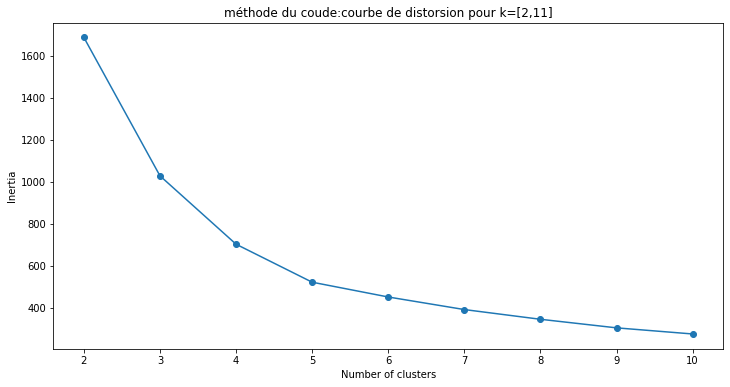

In [7]:
# affiche les résultats stocker dans la variable SSE en fonction de K
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("méthode du coude:courbe de distorsion pour k=[2,11]")
plt.savefig('../Data/Graphes/methode_du_coude_courbe_de_distorsion.png',dpi=200)

In [8]:
print(hdr_data["indicator_descriptions"][2] )
print(hdr_data["indicator_descriptions"][7] )
print(hdr_data["indicator_descriptions"][8] )
print(hdr_data["indicator_descriptions"][20] )
print(hdr_data["indicator_descriptions"][22] )
print(hdr_data["indicator_descriptions"][28] )
print(hdr_data["indicator_descriptions"][29] )
print(hdr_data["indicator_descriptions"][34] )
print(hdr_data["indicator_descriptions"][36] )
print(hdr_data["indicator_descriptions"][40] )
print(hdr_data["indicator_descriptions"][41] )
print(hdr_data["indicator_descriptions"][42] )

average annual change in consumer price index (%%) 1990-2004
GDP (US$ billions) 2004
GDP (PPP US$ billions) 2004
one-years-olds fully immunized against measles (%%) 2004
net foreign direct  investment inflows (%% GDP) 2004
refugees by country of asylum (thousands) 2005
refugees by country of origin (thousands) 2005
total population 1975 (millions)
total population 2015 (millions)
ODA per capita of donor country (2004 US$ ) 2004
ODA to least developed countries (%% of total) 1990
ODA to least developed countries (%% of total) 2004


In [9]:
#Max_Min_value = {}
#Max_Min_value[0] = [[0] * 1] * 4
#Max_Min_value[1] = [[1] * 1] * 4

In [11]:
#Max_Min_value[i] = [[0] * 1] * y


In [19]:
round( min(AllStat2[0][8]) ,2)

-0.45